## Focus: Compare ACT and SAT Scores with Per-capita Income
### Question 1: Is there a correlation between a student with a high ACT-score also taking the SAT?
### Question 2 : What is the correlation between students' income levels and test scores?

In [71]:
# Load required programs 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the two csv files of data
df_act = pd.read_csv('act.csv', encoding='utf-8-sig', low_memory = False)

In [3]:
# Load the two csv files of data
df_sat = pd.read_csv('sat.csv', encoding='utf-8-sig', low_memory = False)

In [4]:
# Print the first five rows of each dataframe
df_act.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [5]:
# Print the first five rows of each dataframe
df_sat.head(5)

,State,Participation,Evidence=based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [6]:
# Print the last five rows of each dataframe
df_act.tail(5)

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


In [7]:
# Print the last five rows of each dataframe
df_sat.tail(5)

,State,Participation,Evidence=based Reading and Writing,Math,Total
46,Virginia,65%,561,541,1102
47,Washington,64%,541,534,1075
48,West Virginia,14%,558,528,1086
49,Wisconsin,3%,642,649,1291
50,Wyoming,3%,626,604,1230


## Column Labels for ACT; SAT and Income Dataframes

#### State (50 total plus DC) | Otherwise, National is the entire USA including 
#### Participation - Student percentage of test-takers
#### Other columns - Subject Names 
#### Total Column - The sum of all (SAT) test-subjects
#### Composite - Mean toal of all (ACT) test-subjects 
#### Income - Per Capita Income by State

In [8]:
# Check for data outliers... There is one which is 2.3 
df_act.sort_values(['Science']).head()

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6
29,Nevada,100%,16.3,18.0,18.1,18.2,17.8
25,Mississippi,100%,18.2,18.1,18.8,18.8,18.6
41,South Carolina,100%,17.5,18.6,19.1,18.9,18.7
34,North Carolina,100%,17.8,19.3,19.6,19.3,19.1


In [9]:
# Check for data outliers... This is one which is 52 
df_sat.sort_values(['Math']).head()

,State,Participation,Evidence=based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
22,Michigan,100%,509,495,1005


In [10]:
# Recheck the data source for last posted average in 2020 
df_act.loc[21,'Science'] = 23.8

In [11]:
# Recheck the data source for last posted average in 2020 
df_sat.loc[20,'Math'] = 524

In [12]:
# Determine datatypes for each column 
df_act['Total']=df_act['English']+df_act['Math']+df_act['Reading']+df_act['Science']

In [13]:
# Print out the datatypes in the ACT Dataframe
df_act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
Total            float64
dtype: object

In [14]:
# Repeat the same step (SAT Dataframe)
df_sat.dtypes

State                                  object
Participation                          object
Evidence=based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [15]:
# Unify the ACT data-types  
df_act['Participation'] = df_act['Participation'].str[:-1]
df_act['Participation'] = pd.to_numeric(df_act['Participation'])

In [16]:
# Repeat the same step for the SAT data-types 
df_sat['Participation'] = df_sat['Participation'].str[:-1]
df_sat['Participation'] = pd.to_numeric(df_sat['Participation'])

In [17]:
# Recheck ACT Data Head and Tail (Also, to Visually Check for Lower Participation Rates)
df_act.head()

,State,Participation,English,Math,Reading,Science,Composite,Total
0,National,60,20.3,20.7,21.4,21.0,21.0,83.4
1,Alabama,100,18.9,18.4,19.7,19.4,19.2,76.4
2,Alaska,65,18.7,19.8,20.4,19.9,19.8,78.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7,78.3
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4,77.1


In [18]:
df_act.tail()

,State,Participation,English,Math,Reading,Science,Composite,Total
47,Virginia,29,23.5,23.3,24.6,23.5,23.8,94.9
48,Washington,29,20.9,21.9,22.1,22.0,21.9,86.9
49,West Virginia,69,20.0,19.4,21.2,20.5,20.4,81.1
50,Wisconsin,100,19.7,20.4,20.6,20.9,20.5,81.6
51,Wyoming,100,19.4,19.8,20.8,20.6,20.2,80.6


In [19]:
# Recheck SAT Data Head and Tail (Also, to Visually Check for Lower Participation Rates)
df_sat.head()

,State,Participation,Evidence=based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [20]:
df_sat.tail()

,State,Participation,Evidence=based Reading and Writing,Math,Total
46,Virginia,65,561,541,1102
47,Washington,64,541,534,1075
48,West Virginia,14,558,528,1086
49,Wisconsin,3,642,649,1291
50,Wyoming,3,626,604,1230


In [21]:
# Create a dictionary for more detailed data analysis of the ACT and SAT Dataframes 
dict_sat_rw = {}
dict_sat_math = {}
dict_sat_total = {}

for i in df_sat.values:
    dict_sat_rw[i[0]]=i[2]
    dict_sat_math[i[0]]=i[3]
    dict_sat_total[i[0]]=i[4]
    
dict_act_english = {}
dict_act_math = {}
dict_act_reading = {}
dict_act_science = {}
dict_act_composit = {}

for i in df_act.values:
    dict_act_english[i[0]] = i[2]
    dict_act_math[i[0]] = i[3]
    dict_act_reading[i[0]] = i[4]
    dict_act_science[i[0]] = i[5]
    dict_act_composit[i[0]] = i[6]

In [22]:
# Create unified dictionaries for both datasets
dict_sat = df_sat.to_dict()
dict_act = df_act.to_dict()

In [23]:
# Strip columns due to an error with trying to merge on State
df_act.columns = df_act.columns.str.strip()
df_sat.columns = df_sat.columns.str.strip()

In [24]:
# Merge the dataframes into a new Total Dataframe
df_total = pd.merge(df_act,df_sat,on='State')
df_total.head()

,State,Participation_x,English,Math_x,Reading,Science,Composite,Total_x,Participation_y,Evidence=based Reading and Writing,Math_y,Total_y
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,76.4,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,78.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,78.3,30,563,553,1116
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,77.1,3,614,594,1208
4,California,31,22.5,22.7,23.1,22.2,22.8,90.5,53,531,524,1055


In [25]:
# Rename ACT / SAT Columns for differentiation from Raw Data to the Working Dataset
df_total.rename(index=str, inplace=True, columns={'Participation_x':'Participation_ACT',
                                    'English':'English_ACT',
                                    'Math_x':'Math_ACT',
                                    'Reading':'Reading_ACT',
                                    'Science':'Science_ACT',
                                    'Composite':'Composite_ACT',
                                    'Total_x':'Total_ACT',              
                                    'Participation_y':'Participation_SAT',
                                    'Evidence=based Reading and Writing':'EBRW_SAT',
                                    'Math_y':'Math_SAT',
                                    'Total_y':'Total_SAT'
                                       })
df_total.head()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Total_ACT,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,76.4,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,78.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,78.3,30,563,553,1116
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,77.1,3,614,594,1208
4,California,31,22.5,22.7,23.1,22.2,22.8,90.5,53,531,524,1055


In [26]:
# Display both the minimum and maximum for all columns in the new dataframe
for i in df_total.columns:
    if df_total.dtypes[i]=='int64' or df_total.dtypes[i]=='float64':
        print("{}: min {}, max {}".format(i,min(df_total[i]),max(df_total[i])))

Participation_ACT: min 8, max 100
English_ACT: min 16.3, max 25.5
Math_ACT: min 18.0, max 25.3
Reading_ACT: min 18.1, max 26.0
Science_ACT: min 18.2, max 24.9
Composite_ACT: min 17.8, max 25.5
Total_ACT: min 70.6, max 101.4
Participation_SAT: min 2, max 100
EBRW_SAT: min 482, max 644
Math_SAT: min 468, max 651
Total_SAT: min 950, max 1295


In [27]:
# Load required programs 
import numpy as np

In [28]:
# Outliers removed; Create Function for Standard Deviation and add this to a new list sd
def my_sd(data):
    return np.sqrt(np.mean([(x-data.mean())**2 for x in data]))

In [29]:
# Use this function to display the Standard Deviation results 
sd = []
for i in df_total.columns:
    if df_total.dtypes[i]=='int64' or df_total.dtypes[i]=='float64':
        sd.append(my_sd(df_total[i]))
sd

[31.824175751231806,
 2.3304876369363368,
 1.9624620273436781,
 2.046902931484265,
 1.7361170088327353,
 2.0007860815819893,
 8.017022451082516,
 34.929070766645076,
 45.21697020437866,
 46.65713364485504,
 91.58351056778743]

In [30]:
# Use the new sd list and display the results matched with Columns
df_sd = {'State':'Standard deviation'}
sd = []
for i in df_total.columns:
    if df_total.dtypes[i]=='int64' or df_total.dtypes[i]=='float64':
        df_sd[i]=[my_sd(df_total[i])]
df_sd

{'State': 'Standard deviation',
 'Participation_ACT': [31.824175751231806],
 'English_ACT': [2.3304876369363368],
 'Math_ACT': [1.9624620273436781],
 'Reading_ACT': [2.046902931484265],
 'Science_ACT': [1.7361170088327353],
 'Composite_ACT': [2.0007860815819893],
 'Total_ACT': [8.017022451082516],
 'Participation_SAT': [34.929070766645076],
 'EBRW_SAT': [45.21697020437866],
 'Math_SAT': [46.65713364485504],
 'Total_SAT': [91.58351056778743]}

In [31]:
# Create a new dataframe (adding the Standard Deviation data)
df_total = df_total.append(pd.DataFrame(df_sd), ignore_index=True)

In [32]:
# Confirm this new dataframe works 
df_total.head()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Total_ACT,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,76.4,5.0,593.0,572.0,1165.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,78.8,38.0,547.0,533.0,1080.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,78.3,30.0,563.0,553.0,1116.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,77.1,3.0,614.0,594.0,1208.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,90.5,53.0,531.0,524.0,1055.0


In [33]:
df_total.tail()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Total_ACT,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT
47,Washington,29.000000,20.900000,21.900000,22.100000,22.000000,21.900000,86.900000,64.000000,541.00000,534.000000,1075.000000
48,West Virginia,69.000000,20.000000,19.400000,21.200000,20.500000,20.400000,81.100000,14.000000,558.00000,528.000000,1086.000000
49,Wisconsin,100.000000,19.700000,20.400000,20.600000,20.900000,20.500000,81.600000,3.000000,642.00000,649.000000,1291.000000
50,Wyoming,100.000000,19.400000,19.800000,20.800000,20.600000,20.200000,80.600000,3.000000,626.00000,604.000000,1230.000000
51,Standard deviation,31.824176,2.330488,1.962462,2.046903,1.736117,2.000786,8.017022,34.929071,45.21697,46.657134,91.583511


In [34]:
# Clean-up the new dataframe 
df_total.drop(51,inplace=True)

In [35]:
# Sort the values within the dataframe numerically for ACT participation in descending order  
df_total.sort_values(['Participation_ACT'],inplace=True)
df_total.head()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Total_ACT,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT
19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,96.7,95.0,513.0,499.0,1012.0
29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,101.4,96.0,532.0,520.0,1052.0
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,95.9,100.0,503.0,492.0,996.0
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,95.4,71.0,539.0,524.0,1062.0
38,Pennsylvania,23.0,23.4,23.4,24.2,23.3,23.7,94.3,65.0,540.0,531.0,1071.0


In [36]:
# Sorting the dataframe by Index  
df_total.sort_index(inplace = True)
df_total.head()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Total_ACT,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,76.4,5.0,593.0,572.0,1165.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,78.8,38.0,547.0,533.0,1080.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,78.3,30.0,563.0,553.0,1116.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,77.1,3.0,614.0,594.0,1208.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,90.5,53.0,531.0,524.0,1055.0


In [37]:
# Create a Boolean filter to sort based on participation rates and above X for ACT Math score 
df_total[(df_total['Participation_ACT']>65)&(df_total['Math_ACT']>21)]

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Total_ACT,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT
13,Illinois,93.0,21.0,21.2,21.6,21.3,21.4,85.1,9.0,559.0,556.0,1115.0
15,Iowa,67.0,21.2,21.3,22.6,22.1,21.9,87.2,2.0,641.0,635.0,1275.0
16,Kansas,73.0,21.1,21.3,22.3,21.7,21.7,86.4,4.0,632.0,628.0,1260.0
23,Minnesota,100.0,20.4,21.5,21.8,21.6,21.5,85.3,3.0,644.0,651.0,1295.0
35,Ohio,75.0,21.2,21.6,22.5,22.0,22.0,87.3,12.0,578.0,570.0,1149.0
41,South Dakota,80.0,20.7,21.5,22.3,22.0,21.8,86.5,3.0,612.0,603.0,1216.0


<AxesSubplot:title={'center':'Participation, SAT'}, ylabel='Frequency'>

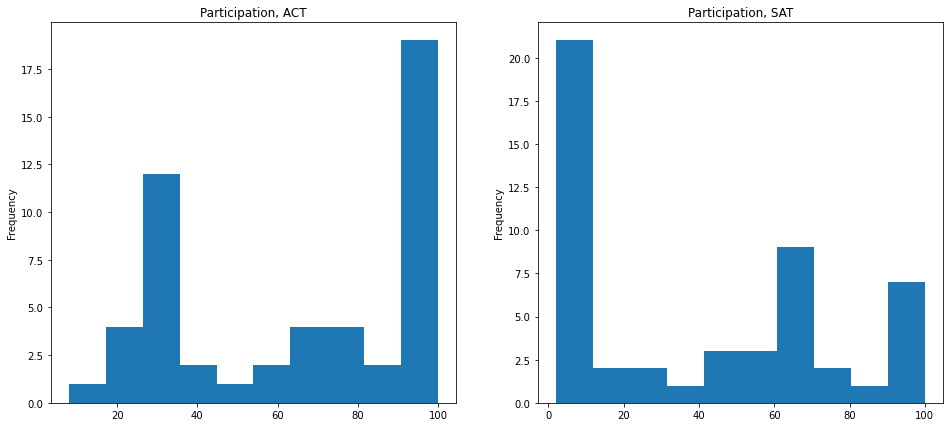

In [38]:
# Plot ACT and SAT Participation results visually 
figure,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,7))
df_total['Participation_ACT'].plot(ax=ax[0],title="Participation, ACT",kind='hist')
df_total['Participation_SAT'].plot(ax=ax[1],title="Participation, SAT",kind='hist')

Text(0.5, 1.0, 'Math, comparing')

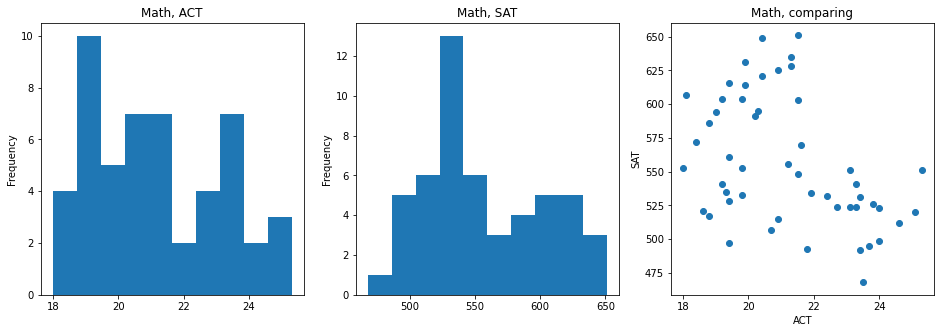

In [39]:
# Plot ACT and SAT Math results visually 
figure,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
df_total['Math_ACT'].plot(ax=ax[0],title="Math, ACT",kind='hist')
df_total['Math_SAT'].plot(ax=ax[1],title="Math, SAT",kind='hist')
plt.scatter(df_total['Math_ACT'],df_total['Math_SAT'])
plt.ylabel('SAT')
plt.xlabel('ACT')
plt.title('Math, comparing')

### Insights -  
#### No real correlation between the results for the Math ACT and the Math SAT tests
##### This could be attributable to something as simple as how the datasets were compiled or to something more complex such as rural versus urban students; ethnicity; gender; race; their core curriculum and respective state's requirements, etc. 

In [40]:
# Recheck the Dataframe Columns 
df_total.columns

Index(['State', 'Participation_ACT', 'English_ACT', 'Math_ACT', 'Reading_ACT',
       'Science_ACT', 'Composite_ACT', 'Total_ACT', 'Participation_SAT',
       'EBRW_SAT', 'Math_SAT', 'Total_SAT'],
      dtype='object')

Text(0.5, 1.0, 'English, comparing')

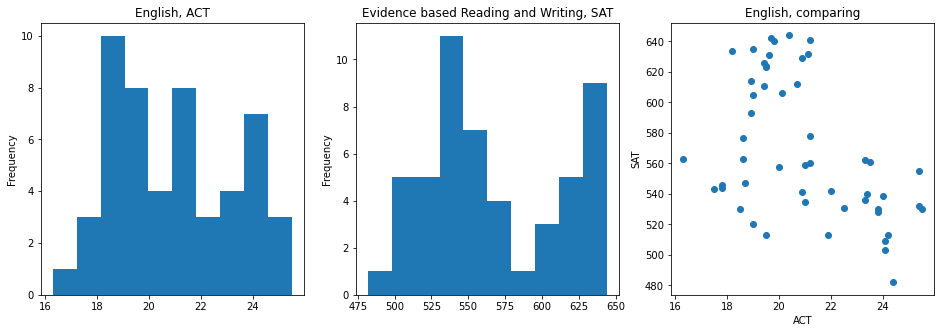

In [41]:
# Continue plotting ACT and SAT Test results 
figure,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
df_total['English_ACT'].plot(ax=ax[0],title="English, ACT",kind='hist')
df_total['EBRW_SAT'].plot(ax=ax[1],title="Evidence based Reading and Writing, SAT",kind='hist')
plt.scatter(df_total['English_ACT'],df_total['EBRW_SAT'])
plt.ylabel('SAT')
plt.xlabel('ACT')
plt.title('English, comparing')

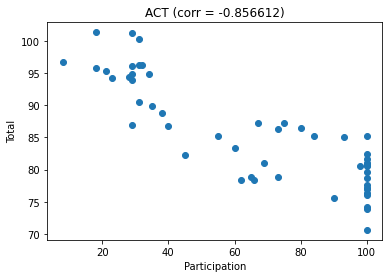

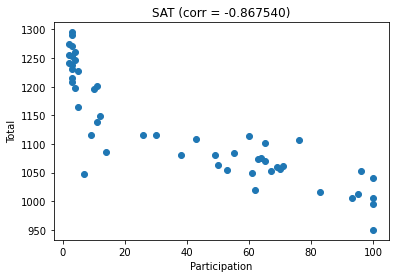

In [42]:
# Check ACT and SAT data distribution  
plt.scatter(df_act['Participation'],df_act['Total'])
plt.ylabel('Total')
plt.xlabel('Participation')
plt.title('ACT (corr = -0.856612)')
plt.show()

plt.scatter(df_sat['Participation'],df_sat['Total'])
plt.ylabel('Total')
plt.xlabel('Participation')
plt.title('SAT (corr = -0.867540)')
plt.show()

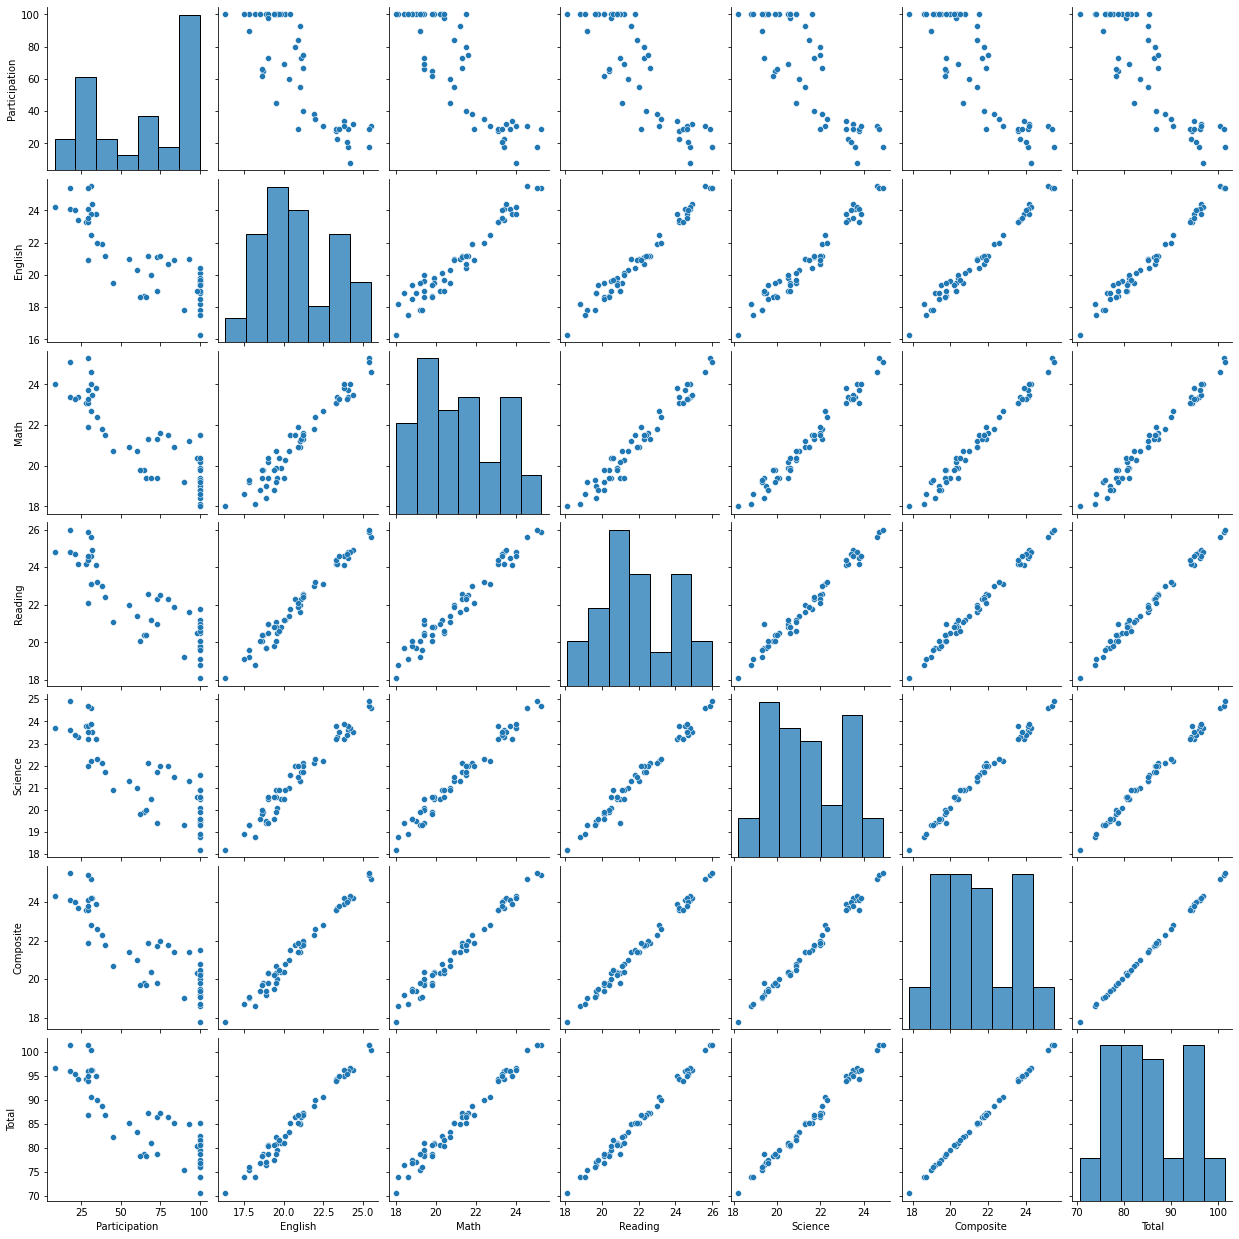

In [43]:
# Plot the ACT test results  
sns.pairplot(data=df_act)

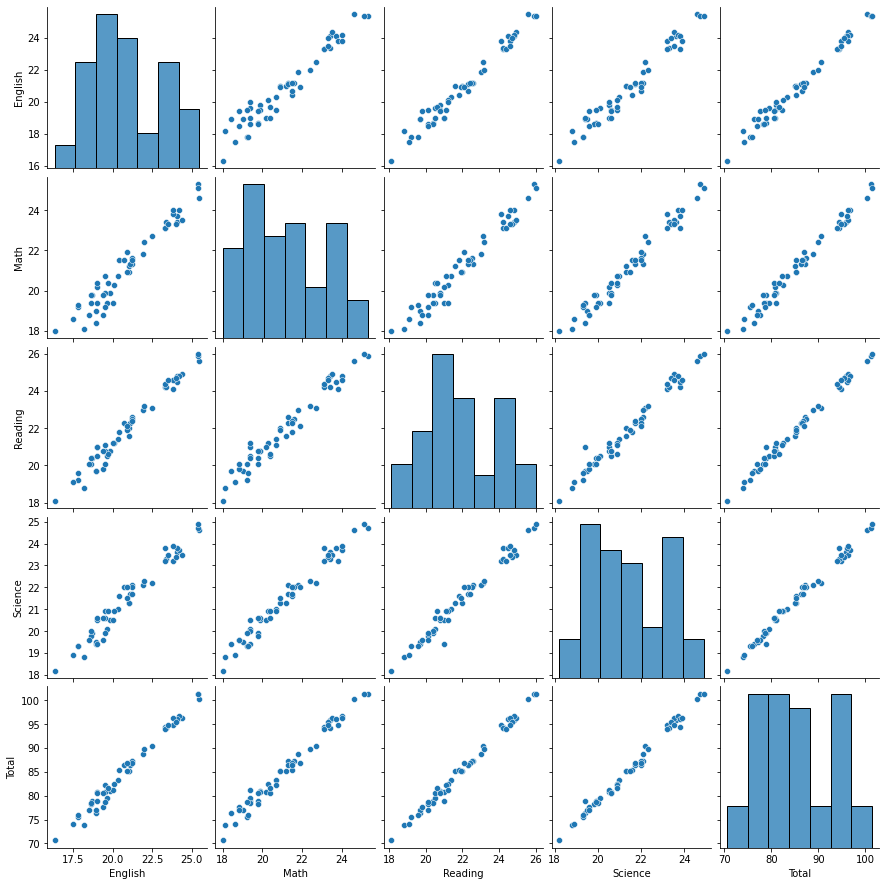

In [44]:
# Continue plotting the ACT test results
sns.pairplot(data=df_act[['English','Math','Reading','Science','Total']])

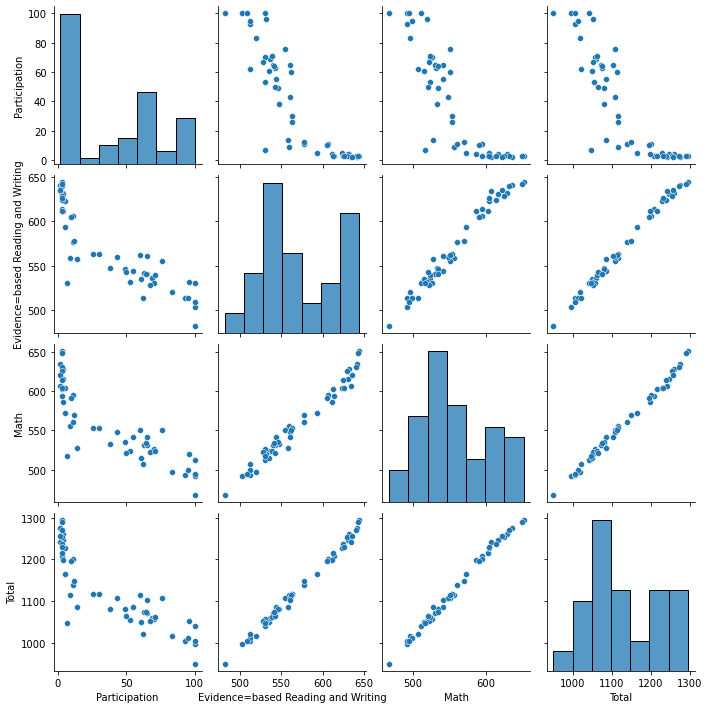

In [45]:
# Plot the ACT test results  
sns.pairplot(data=df_sat)

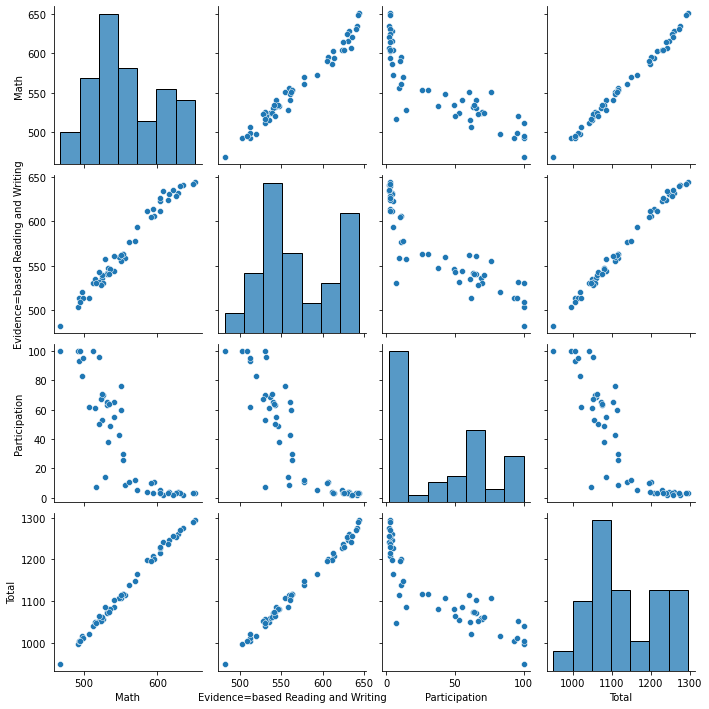

In [60]:
# Continue plotting the SAT test results  
sns.pairplot(data=df_sat[['Math','Evidence=based Reading and Writing','Participation','Total']])

### Insights - 
#### Average grades of all ACT/SAT subjects are linear
##### This could be contributed to students focusing on preparing for standardized testing 
#### Negative correlations between participation-levels and average grades 
##### Aside from students with higher scores on one test opting-out of taking an additional test, it could also mean the results of this data was skewed because of income-disparities between wealthier students and less-wealthier students or rural versus urban test-takers and/or gender, etc.!

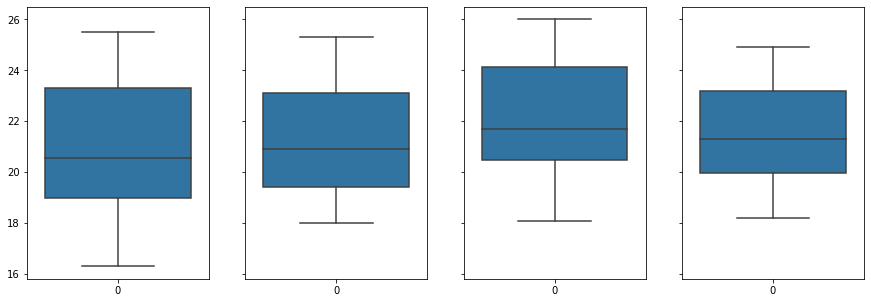

In [55]:
# Average grade(s) boxplots for each ACT Test variable 
figure,ax = plt.subplots(1, 4, sharey=True, figsize=(15, 5))
for i,name in enumerate(df_act.columns[2:-2]):
    sns.boxplot(data=df_act[name],ax=ax[i])

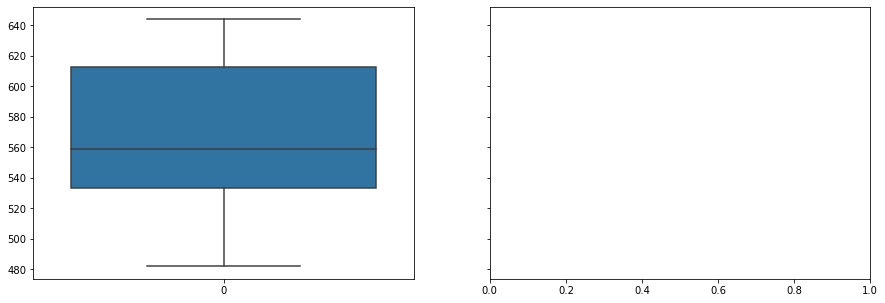

In [61]:
# Average grade(s) boxplots for each SAT Test variable 
figure,ax = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
for i,name in enumerate(df_sat.columns[2:-2]):
    sns.boxplot(data=df_sat[name],ax=ax[i])

In [62]:
# Load required program 
import scipy.stats as stats

In [63]:
# Function for description of the distribution of numeric values; check whether or not the distribution is normal
def description(dataframe,column):
    n = dataframe[column].describe()['count']
    mean = dataframe[column].describe()['mean']
    std = dataframe[column].describe()['std']
    skew = stats.skew(dataframe[column])
    dis_skew = 6*(n-1)/((n+1)*(n+3))
    kurtosis = stats.kurtosis(dataframe[column])
    dis_kurtosis = 24*(n-2)*(n-3)*n/((n+3)*(n+5)*(n-1)**2)
    norm_dist = (np.abs(skew)<=np.sqrt(dis_skew)) and (np.abs(kurtosis)<=np.sqrt(dis_kurtosis))
    print('{} is {}normally distributed; mean {:.2f}; std {:.2f}; skew {:.2f}'.format(column,
                                                                          '' if norm_dist else 'NOT ',
                                                                          mean,
                                                                          std,
                                                                          skew))
          
for i in df_total.columns[1:]:
    description(df_total,i)

Participation_ACT is NOT normally distributed; mean 65.25; std 32.14; skew -0.19
English_ACT is NOT normally distributed; mean 20.93; std 2.35; skew 0.34
Math_ACT is NOT normally distributed; mean 21.18; std 1.98; skew 0.32
Reading_ACT is NOT normally distributed; mean 22.01; std 2.07; skew 0.26
Science_ACT is NOT normally distributed; mean 21.46; std 1.75; skew 0.22
Composite_ACT is NOT normally distributed; mean 21.52; std 2.02; skew 0.31
Total_ACT is NOT normally distributed; mean 85.59; std 8.10; skew 0.31
Participation_SAT is NOT normally distributed; mean 39.80; std 35.28; skew 0.34
EBRW_SAT is NOT normally distributed; mean 569.12; std 45.67; skew 0.26
Math_SAT is NOT normally distributed; mean 556.88; std 47.12; skew 0.35
Total_SAT is NOT normally distributed; mean 1126.10; std 92.49; skew 0.30


In [64]:
# Simplified version of the previous step 
alpha = 0.05
for i in df_total.columns[1:]:
    print('{} is {}normally distributed'.format(i,'' if stats.normaltest(df_total[i])[1]>alpha else 'NOT '))

Participation_ACT is NOT normally distributed
English_ACT is normally distributed
Math_ACT is NOT normally distributed
Reading_ACT is NOT normally distributed
Science_ACT is NOT normally distributed
Composite_ACT is NOT normally distributed
Total_ACT is NOT normally distributed
Participation_SAT is NOT normally distributed
EBRW_SAT is NOT normally distributed
Math_SAT is normally distributed
Total_SAT is NOT normally distributed


### Insights -  
#### Categorical mix between normal and not normally distributed 
##### The normal English distribution could be attributed to something as simple as studying in the American Educational System
##### The normal Math distribution could also be attributed to the subject being compulsory and/or students studying for a Standardized-test

In [65]:
# Check for ACT test-results correlation 
df_act.corr()

,Participation,English,Math,Reading,Science,Composite,Total
Participation,1.000000,-0.841826,-0.859609,-0.864694,-0.836193,-0.856530,-0.856982
English,-0.841826,1.000000,0.967838,0.986012,0.979111,0.990867,0.991379
Math,-0.859609,0.967838,1.000000,0.979632,0.985662,0.990461,0.989691
Reading,-0.864694,0.986012,0.979632,1.000000,0.987369,0.995061,0.995559
Science,-0.836193,0.979111,0.985662,0.987369,1.000000,0.994214,0.994539
Composite,-0.856530,0.990867,0.990461,0.995061,0.994214,1.000000,0.999842
Total,-0.856982,0.991379,0.989691,0.995559,0.994539,0.999842,1.000000


### Insights -
#### Strong correlation between all ACT subjects average grade and the total score
##### Again, this could be contributed to students focusing on preparing for standardized testing 
#### Weak correlation between ACT participation and grade
##### Aside from students with higher scores on one test opting-out of taking an additional test, another second or third, etc. variable could be related to why this correlation is weak in this instance

In [66]:
# Check for SAT test-results correlation 
df_sat.corr()

,Participation,Evidence=based Reading and Writing,Math,Total
Participation,1.000000,-0.874326,-0.855091,-0.867540
Evidence=based Reading and Writing,-0.874326,1.000000,0.987056,0.996661
Math,-0.855091,0.987056,1.000000,0.996822
Total,-0.867540,0.996661,0.996822,1.000000


### Insights -
#### Strong correlation between all SAT subjects' average grade and the total score
##### Again, this could be contributed to students focusing on preparing for standardized testing 
#### Weak correlation between SAT participation and grade
##### Again, aside from students with higher scores on one test opting-out of taking an additional test, another second or third, etc. variable could be related to why this correlation is weak in this instance

In [67]:
# ACT / SAT Hypothesis test (Independent populations) 
np.corrcoef(df_total['Participation_ACT'],df_total['Participation_SAT'])

array([[ 1.        , -0.84123446],
       [-0.84123446,  1.        ]])

In [68]:
# Negative correlation (Dependent populations)
stats.ttest_rel(df_total['Participation_ACT'], df_total['Participation_SAT'])

Ttest_relResult(statistic=2.809551978370788, pvalue=0.00706192842208239)

### Insights - 
#### Results indication evidence of different populations of test-takers
##### While income might be an influence herein other factors such as rural versus urban; ethnicity; gender; race or core curriculum could all be factors herein

In [69]:
# Check Confidence Intervals 
def confidence_interval(data,name,percent):
    if percent<0 or percent>100:
        print("Error! Percent must be between 0 and 100 inclusive!")
    else:
        first_percentile = np.percentile(data,(100-percent)/2)
        last_percentile = np.percentile(data,100-(100-percent)/2)
        print('{}% confidence interval for {} is:{}, {}'.format(percent,name,first_percentile,last_percentile))

confidence_interval(df_act['Participation'],'ACT participation',95) # that means that 95%    
confidence_interval(df_sat['Participation'],'SAT participation',95)

95% confidence interval for ACT participation is:18.0, 100.0
95% confidence interval for SAT participation is:2.0, 100.0


### Insights - 
#### Confidence Intervals are not only different but there is a discrepancy between ACT and SAT participation
##### Again, while income might be an influence herein other factors such as rural versus urban; ethnicity; gender; race or core curriculum could all be factors herein

In [70]:
# If there was not such a big discrepancy between students who took both the ACT and SAT, this analysis would 
# make the most sense to be applied within states where there are equal numbers of ACT and SAT test-takers
np.corrcoef(df_total['Math_ACT'],df_total['Math_SAT'])

array([[ 1.        , -0.42045604],
       [-0.42045604,  1.        ]])

In [48]:
# Load one additional csv file of data on 2017 US per capita income
df_income = pd.read_csv('income.csv', encoding='utf-8-sig', low_memory = False)

In [49]:
# # Print the first five rows of this new dataframe
df_income.head(5)

,State,Income
0,Alabama,37508
1,Alaska,63610
2,Arizona,39583
3,Arkansas,36714
4,California,60359


In [50]:
# Check Tail (Also, to Visually Check for Lower Per Capita Income)
df_income.tail()

,State,Income
46,Virginia,52124
47,Washington,59333
48,West Virginia,37353
49,Wisconsin,48666
50,Wyoming,61091


In [74]:
# Sort based on Incomes 
df_income.sort_values(['Income']).head()

,State,Income
24,Mississippi,32447
12,Idaho,36441
3,Arkansas,36714
48,West Virginia,37353
0,Alabama,37508


In [75]:
# Check the data-types in this new dataframe
df_income.dtypes

State     object
Income     int64
dtype: object

In [76]:
# Create a new dictionary
dict_income = df_income.to_dict()

In [79]:
# Recheck Head 
df_income.head()

,State,Income
0,Alabama,37508
1,Alaska,63610
2,Arizona,39583
3,Arkansas,36714
4,California,60359


In [80]:
# Sort this Income dataframe in descending order 
df_income.sort_values(['Income'],inplace=True)
df_income.head()

,State,Income
24,Mississippi,32447
12,Idaho,36441
3,Arkansas,36714
48,West Virginia,37353
0,Alabama,37508


In [84]:
# Skipped this step but left this cell for reference 
vertical_stack = pd.concat([df_total, df_income], axis=0)

In [85]:
# Check the new dataframe 
df_total.head()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Total_ACT,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,76.4,5.0,593.0,572.0,1165.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,78.8,38.0,547.0,533.0,1080.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,78.3,30.0,563.0,553.0,1116.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,77.1,3.0,614.0,594.0,1208.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,90.5,53.0,531.0,524.0,1055.0


In [87]:
# Stripped columns for uniformity 
df_income.columns = df_income.columns.str.strip()

In [88]:
# Check Tail (Also, to Visually Check for Outliers)
df_income.tail()

,State,Income
7,Delaware,63955
34,North Dakota,64911
32,New York,65220
21,Massachusetts,66500
8,District of Columbia,159607


In [56]:
# Check the Index of the previous dataframe 
df_total.columns

Index(['State', 'Participation_ACT', 'English_ACT', 'Math_ACT', 'Reading_ACT',
       'Science_ACT', 'Composite_ACT', 'Total_ACT', 'Participation_SAT',
       'EBRW_SAT', 'Math_SAT', 'Total_SAT'],
      dtype='object')

In [57]:
# Check the Index of the new dataframe 
df_income.columns

Index(['State ', 'Income'], dtype='object')

In [63]:
# Merge the existing dataframe with the new dataframe 
df_total = pd.merge(df_total,df_income,left_on='State',right_on='State ')
df_total.head()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Total_ACT,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT,State,Income
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,76.4,5.0,593.0,572.0,1165.0,Alabama,37508
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,78.8,38.0,547.0,533.0,1080.0,Alaska,63610
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,78.3,30.0,563.0,553.0,1116.0,Arizona,39583
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,77.1,3.0,614.0,594.0,1208.0,Arkansas,36714
4,California,31.0,22.5,22.7,23.1,22.2,22.8,90.5,53.0,531.0,524.0,1055.0,California,60359


In [64]:
# Recheck new dataframe Index
df_income.columns

Index(['State ', 'Income'], dtype='object')

In [65]:
# Check new dataframe Columns
df_total.columns

Index(['State', 'Participation_ACT', 'English_ACT', 'Math_ACT', 'Reading_ACT',
       'Science_ACT', 'Composite_ACT', 'Total_ACT', 'Participation_SAT',
       'EBRW_SAT', 'Math_SAT', 'Total_SAT', 'State ', 'Income'],
      dtype='object')

In [66]:
# Correct minor formatting error on the second 'State' Column Header
df_total.columns = df_total.columns.str.strip()

In [67]:
# Recheck to confirm correction
df_total.columns

Index(['State', 'Participation_ACT', 'English_ACT', 'Math_ACT', 'Reading_ACT',
       'Science_ACT', 'Composite_ACT', 'Total_ACT', 'Participation_SAT',
       'EBRW_SAT', 'Math_SAT', 'Total_SAT', 'State', 'Income'],
      dtype='object')

In [69]:
# Load required program
import scipy.stats as stats

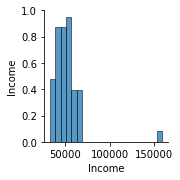

In [77]:
# Quick check Income Column Plot
sns.pairplot(data=df_income)

In [81]:
# Check new dataframe types
df_total.dtypes

State                 object
Participation_ACT    float64
English_ACT          float64
Math_ACT             float64
Reading_ACT          float64
Science_ACT          float64
Composite_ACT        float64
Total_ACT            float64
Participation_SAT    float64
EBRW_SAT             float64
Math_SAT             float64
Total_SAT            float64
State                 object
Income                 int64
dtype: object

In [85]:
# Check All Income Columns 
df_total['Income'].astype('float64')

0      37508.0
1      63610.0
2      39583.0
3      36714.0
4      60359.0
5      54026.0
6      62633.0
7      63955.0
8     159607.0
9      39842.0
10     45925.0
11     52869.0
12     36441.0
13     55102.0
14     46427.0
15     52284.0
16     47435.0
17     39277.0
18     44372.0
19     39521.0
20     56375.0
21     66500.0
22     44201.0
23     54805.0
24     32447.0
25     43036.0
26     39833.0
27     54654.0
28     44812.0
29     52509.0
30     56776.0
31     41619.0
32     65220.0
33     44706.0
34     64911.0
35     48188.0
36     44535.0
37     51312.0
38     51841.0
39     48314.0
40     37637.0
41     48004.0
42     44348.0
43     53737.0
44     45493.0
45     44831.0
46     52124.0
47     59333.0
48     37353.0
49     48666.0
50     61091.0
Name: Income, dtype: float64

In [86]:
# Recheck new dataframe types
df_total.dtypes

State                 object
Participation_ACT    float64
English_ACT          float64
Math_ACT             float64
Reading_ACT          float64
Science_ACT          float64
Composite_ACT        float64
Total_ACT            float64
Participation_SAT    float64
EBRW_SAT             float64
Math_SAT             float64
Total_SAT            float64
State                 object
Income                 int64
dtype: object

In [87]:
# Change Income Column from int64 to float64
df_total['Income'] = df_total['Income'].astype('float64')

In [88]:
df_total.dtypes

State                 object
Participation_ACT    float64
English_ACT          float64
Math_ACT             float64
Reading_ACT          float64
Science_ACT          float64
Composite_ACT        float64
Total_ACT            float64
Participation_SAT    float64
EBRW_SAT             float64
Math_SAT             float64
Total_SAT            float64
State                 object
Income               float64
dtype: object

In [89]:
# Rename the Income Column in new dataframe 
df_total.rename(index=str, inplace=True, columns={'Income':'Income_Test'})
df_total.head()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Total_ACT,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT,State,Income_Test
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,76.4,5.0,593.0,572.0,1165.0,Alabama,37508.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,78.8,38.0,547.0,533.0,1080.0,Alaska,63610.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,78.3,30.0,563.0,553.0,1116.0,Arizona,39583.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,77.1,3.0,614.0,594.0,1208.0,Arkansas,36714.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,90.5,53.0,531.0,524.0,1055.0,California,60359.0


In [94]:
# Check Minimum Income
df_total[['Income_Test']].min().max()

32447.0

In [95]:
# Check Maximum Income
df_total[['Income_Test']].max().max()

159607.0

In [96]:
# Check Median Income
df_total['Income_Test'].median()

48188.0

Text(0.5, 1.0, 'Income, comparing')

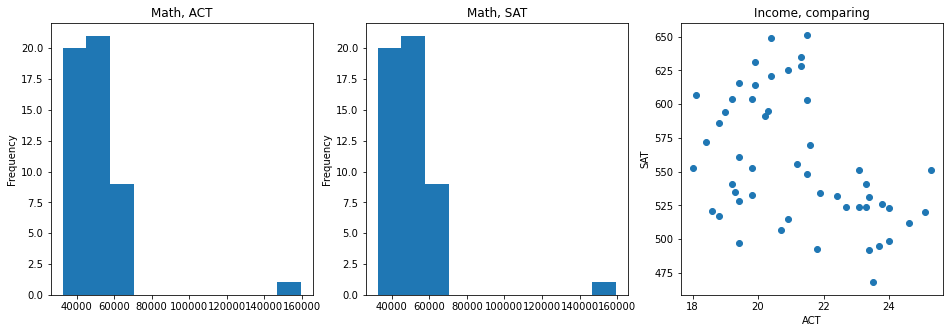

In [98]:
# Plot ACT and SAT Math test results with Income
figure,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
df_total['Income_Test'].plot(ax=ax[0],title="Math, ACT",kind='hist')
df_total['Income_Test'].plot(ax=ax[1],title="Math, SAT",kind='hist')
plt.scatter(df_total['Math_ACT'],df_total['Math_SAT'])
plt.ylabel('SAT')
plt.xlabel('ACT')
plt.title('Income, comparing')

Text(0.5, 1.0, 'Income, comparing')

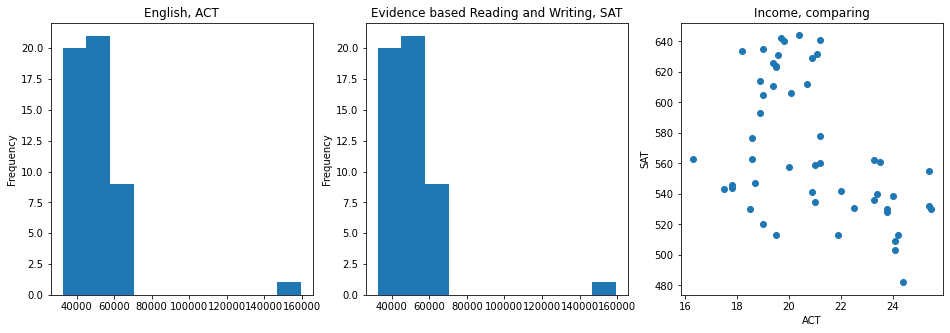

In [99]:
# Continue plotting ACT and SAT test results with Income
figure,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
df_total['Income_Test'].plot(ax=ax[0],title="English, ACT",kind='hist')
df_total['Income_Test'].plot(ax=ax[1],title="Evidence based Reading and Writing, SAT",kind='hist')
plt.scatter(df_total['English_ACT'],df_total['EBRW_SAT'])
plt.ylabel('SAT')
plt.xlabel('ACT')
plt.title('Income, comparing')

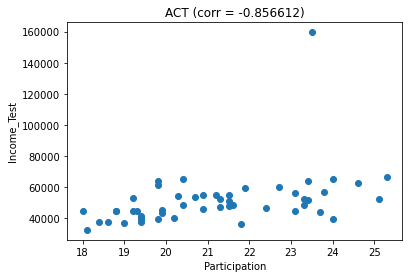

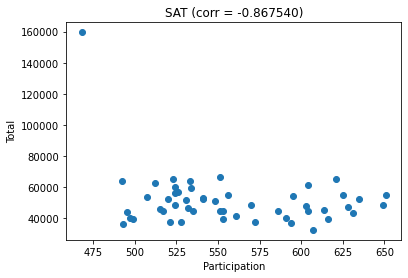

In [105]:
# Check the ACT and SAT data distribution with Income
plt.scatter(df_total['Math_ACT'],df_total['Income_Test'])
plt.ylabel('Income_Test')
plt.xlabel('Participation')
plt.title('ACT (corr = -0.856612)')
plt.show()

plt.scatter(df_total['Math_SAT'],df_total['Income_Test'])
plt.ylabel('Total')
plt.xlabel('Participation')
plt.title('SAT (corr = -0.867540)')
plt.show()

## Summary of Findings - 
### 1) No real correlation between the results for the Math ACT and the Math SAT tests
### 2) Average grades of all ACT/SAT subjects are linear
### 3) Negative correlations between participation-levels and average grades
### 4) Students with higher scores on one test opted-out of taking an additional test
### 5) Categorical mix between normal and not normally distribution in the ACT and SAT test results
### 6) Strong correlation between all ACT subjects' average grade and the total score*
### 7) Weak correlation between ACT participation and grade*
### 8) Strong correlation between all SAT subjects' average grade and the total score*
### 9) Weak correlation between SAT participation and grade*
### 10) Results indicate evidence of different populations of test-takers* (*Regarding points 6; 7; 8; and 9) 
### 11) Confidence Intervals are not only different but there is a discrepancy between ACT and SAT participation*
### While income-levels might influence test-taking results a combination of some or all of other factors including rural versus urban test-takers; gender; ethnicity; race and/or the requirements of each state's core-curriculum might also be contributing factors and influences on student's ACT/SAT test-results

### Data Resources - 

#### ACT: https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows

#### SAT: https://blog.prepscholar.com/average-sat-scores-by-state-most-recent

#### U.S. Depart. of Commerce, Bureau of Economic Analysis: https://www.bea.gov/iTable/index_regional.cfm